# Vorlesung 2: Gruppen von Individuen 
## Data mit Pandas Dataframes



## Pandas Dataframes

In [97]:
import json
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# json.load erzeugt ein dictionary der JSON Daten
with open('chapter1.json') as json_data:
    PoleisRawData = json.load(json_data)

In [3]:
# Abfrage des Datentyps
type(PoleisRawData)

dict

In [4]:
# list() erstellt eine Liste der keys
PoleisKeyList = list(PoleisRawData)
PoleisKeyList

['42. Petra ',
 '44. Selinous ',
 '32. Kephaloidion ',
 '26 *Imachara ',
 '47. Syrakousai ',
 '13. Apollonia ',
 '40. Nakone ',
 '10. Akrai ',
 '5. Abakainon ',
 '49. Tyndaris ',
 '30. Katane ',
 '46. (Stielanaioi)',
 '11. Alaisa ',
 '37. Morgantina ',
 '34. Lipara ',
 '18. Heloron ',
 '9. Akragas ',
 '19. Henna ',
 '6. Adranon ',
 '29. Kasmenai ',
 '36. Megara ',
 '43. Piakos ',
 '25. Hippana ',
 '41. Naxos ',
 '51. Zankle ',
 '20. Herakleia 1',
 '16. Galeria ',
 '33. Leontinoi ',
 '27. Kallipolis ',
 '35. *Longane ',
 '14. Engyon ',
 '8. Aitna ',
 '50. (Tyrrhenoi)',
 '28. Kamarina ',
 '7. Agyrion ',
 '39. Mytistratos ',
 '24. Himera ',
 '12. Alontion ',
 '31. Kentoripa ',
 '21. Herakleia 2 ',
 '17. Gela ',
 '48. Tauromenion ',
 '15. Euboia ',
 '23. Herbita ',
 '45. (Sileraioi)',
 '38. Mylai ',
 '22. Herbes(s)os ']

In [5]:
# Listenelemente werden mit eckigen Klammern ausgewählt. Eine Index-Zahl gibt die n-Stelle der Liste aus
PoleisKeyList[1]

'44. Selinous '

In [6]:
for i in PoleisKeyList:
    if "Megara" in PoleisRawData[i]:
        print(i)

44. Selinous 
47. Syrakousai 
46. (Stielanaioi)
18. Heloron 
36. Megara 
33. Leontinoi 
15. Euboia 


In [7]:
# Der key in eckigen Klammern gibt den Wert des Elements mit dem Key aus
PoleisRawData[PoleisKeyList[4]]

'(Syrakosios) Map  47.  Lat. 37.05,long. 15.15.  Size  of  territory: 5.  Type:  A: .  The  toponym  is (),  (Hecat.  fr. 74;  Thuc. 5.4.3;  IG iv².195.i.39 ( 356/5))  or  (Hdt. 7.156.1);  Pind.  Ol. 6.6  and Bacchyl.  Ep. 5.104  have  ;  is  found at  Pind.  Pyth. 2.1.  The  city-ethnic  is  (C 5  coins, infra;  Thuc. 3.103.1;  IGDS  no. 94  ( 474))  and   (Hdt. 7.155.2).  Also  spelled  (C 6l\xadC5e  coins, infra;  IGDS  no. 93  (c. 480);  cf.  IG v.1217  (C 5e): [ ]). Syracuse  is  called  a  polis  both  in  the  urban  sense  (Hdt. 7.155.2;  Thuc. 6.65.3;  Ps.-Skylax 13)  and  in  the  political  sense (Hdt. 7.154.2;  Thuc. 6.36.2  and  Xen.  Hell. 1.1.28).  Its  politeia was  described  by  Aristotle  (Arist.  fr. 602.1).  Politeuesthai  is found  at  Arist.  Pol. 1312b9,polites  at  Arist.  Pol. 1303a38,politeu- ma  at  Arist.  Pol. 1303b26,  damosios  at  SEG 38  368  (c. 475),  and demos  at  Thuc. 6.35.1.  Astoi  referring  to  the  citizens  is  found at  Pind.  Pyth. 3.71  

In [8]:
# Liest das Dictionary als Dataframe ein. Namen der Poleis werden als Index benutzt.
dfPoleis = pd.DataFrame([PoleisRawData]).transpose()
dfPoleis.head(4)

,0
10. Akrai,"(Akraios) Map 47. Lat. 37.05,long. 14.55. ..."
11. Alaisa,"(Alaisinos) Map 47. Lat. 38.00,long. 14.15...."
12. Alontion,"(Alontinos) Map 47. Lat. 38.05,long. 14.40...."
13. Apollonia,"(Apolloniates) Map 47. Lat. 38.00,long. 14.3..."


# Konstruktion neuer Merkmale
## Textmuster mit regulären Ausdrücken

http://www.regexe.de/hilfe.jsp 
https://www.cheatography.com/davechild/cheat-sheets/regular-expressions/

http://www.coli.uni-saarland.de/courses/python1-10/folien/PythonI10-07.pdf

In [9]:
# Umnennen der Spalte von 0 zu 'full_text'
dfPoleis = dfPoleis.rename(columns={0: 'Beschreibung'})
dfPoleis.head()

,Beschreibung
10. Akrai,"(Akraios) Map 47. Lat. 37.05,long. 14.55. ..."
11. Alaisa,"(Alaisinos) Map 47. Lat. 38.00,long. 14.15...."
12. Alontion,"(Alontinos) Map 47. Lat. 38.05,long. 14.40...."
13. Apollonia,"(Apolloniates) Map 47. Lat. 38.00,long. 14.3..."
14. Engyon,"(Engyinos) Map 47. Lat. 37.45,long. 14.35...."


In [10]:
# Konstruktion einer Liste mit sogenannten List-Comprehensions
ListCities = [x[4:] for x in dfPoleis.index]
ListCities

['Akrai ',
 'Alaisa ',
 'Alontion ',
 'Apollonia ',
 'Engyon ',
 'Euboia ',
 'Galeria ',
 'Gela ',
 'Heloron ',
 'Henna ',
 'Herakleia 1',
 'Herakleia 2 ',
 'Herbes(s)os ',
 'Herbita ',
 'Himera ',
 'Hippana ',
 'Imachara ',
 'Kallipolis ',
 'Kamarina ',
 'Kasmenai ',
 'Katane ',
 'Kentoripa ',
 'Kephaloidion ',
 'Leontinoi ',
 'Lipara ',
 '*Longane ',
 'Megara ',
 'Morgantina ',
 'Mylai ',
 'Mytistratos ',
 'Nakone ',
 'Naxos ',
 'Petra ',
 'Piakos ',
 'Selinous ',
 '(Sileraioi)',
 '(Stielanaioi)',
 'Syrakousai ',
 'Tauromenion ',
 'Tyndaris ',
 'bakainon ',
 '(Tyrrhenoi)',
 'Zankle ',
 'dranon ',
 'gyrion ',
 'itna ',
 'kragas ']

In [11]:
# Extrahiere Name der Polis aus Index
dfPoleis['city'] = [x[4:] for x in dfPoleis.index]

In [12]:
# Extrahiere Nummer des Polis Eintrags
dfPoleis['city_index'] = [int(re.findall('\d{1,2}', x)[0]) for x in dfPoleis.index]

In [13]:
# Sortiere die Zeilen nach der Spalte 
dfPoleis = dfPoleis.sort_values(by='city_index')

In [14]:
# Nutze neuen Index (startet bei 0)
#dfPoleis = dfPoleis.reset_index(drop=True)

In [15]:
dfPoleis.head(4)

,Beschreibung,city,city_index
5. Abakainon,"(Abakaininos) Map 47. Lat. 38.05,long. 15.05...",bakainon,5
6. Adranon,"(Adranites) Map 47. Lat. 37.40,long. 14.50....",dranon,6
7. Agyrion,"(Agyrinaios) Map 47. Lat. 37.40,long. 14.30...",gyrion,7
8. Aitna,(Aitnaios) Map 47.Location of Aitna I as ...,itna,8


## Textmustersuche in der Beschreibung einer Polis
### Neue Funktionen

In [16]:
def ListePattern(value,pattern):
    x = re.findall(pattern, value)
    if x:
        return(x[0][-5:])

### Geographische Koordinaten

In [17]:
# nicht alle haben geographische Koordinaten
listLat=ListePattern(value=dfPoleis['Beschreibung'].iloc[0],pattern="Lat\.\s?\d+\.\d+")
listLat

'38.05'

In [18]:
# gleiches auch für long.
listLong=ListePattern(value=dfPoleis['Beschreibung'].iloc[0],pattern="long\.\s*\d+\.\d+")
listLong

'15.05'

In [19]:
dfPoleis['Latitude'] = dfPoleis['Beschreibung'].apply(ListePattern,pattern=("Lat\.\s?\d+\.\d+")).astype(float)

dfPoleis['Longitude'] = dfPoleis['Beschreibung'].apply(ListePattern,pattern=("long\.\s*\d+\.\d+")).astype(float)

In [20]:
dfPoleis

,Beschreibung,city,city_index,Latitude,Longitude
5. Abakainon,"(Abakaininos) Map 47. Lat. 38.05,long. 15.05...",bakainon,5,38.05,15.05
6. Adranon,"(Adranites) Map 47. Lat. 37.40,long. 14.50....",dranon,6,37.40,14.50
7. Agyrion,"(Agyrinaios) Map 47. Lat. 37.40,long. 14.30...",gyrion,7,37.40,14.30
8. Aitna,(Aitnaios) Map 47.Location of Aitna I as ...,itna,8,NaN,NaN
9. Akragas,"(Akragantinos) Map 47. Lat. 37.20,long. 13....",kragas,9,37.20,13.35
10. Akrai,"(Akraios) Map 47. Lat. 37.05,long. 14.55. ...",Akrai,10,37.05,14.55
11. Alaisa,"(Alaisinos) Map 47. Lat. 38.00,long. 14.15....",Alaisa,11,38.00,14.15
12. Alontion,"(Alontinos) Map 47. Lat. 38.05,long. 14.40....",Alontion,12,38.05,14.40
13. Apollonia,"(Apolloniates) Map 47. Lat. 38.00,long. 14.3...",Apollonia,13,38.00,14.35
14. Engyon,"(Engyinos) Map 47. Lat. 37.45,long. 14.35....",Engyon,14,37.45,14.35


### Zitatnachweise, Namen, Jahreszahlen

In [21]:
dfPoleis["Beschreibung"].iloc[0]

'(Abakaininos) Map  47.  Lat. 38.05,long. 15.05.  Size  of  territory:  ?  Type:  B: .  The  toponym  is ,  (Diod. 14.90.3)  or  ,  (Diod. 19.65.6;  Steph.  Byz. 2.11).  The  city-ethnic  is   (C 4s  coins,  infra;Diod. 14.78.5;  Steph.  Byz. 2.15). Abakainon  is  called  a  polis  in  the  urban  and  political  sens- es  at  Diod. 14.90.3  (r 393)  and  19.65.6  (r 315),  and  in  the  urban sense  at  14.90.4  (r 393).  The  passage  at  14.90.3  describes  it  as  a polis  symmachis  of  Magon,  and  in  a  later  period  it  was  part  of the  symmachia  of  Agathokles,  alongside  such  poleis  as Kamarina,  Leontinoi,  Katane  and  Messana  (Diod. 19.65.6 (r 315),  19.110.4  (r 311)).  The  internal  collective  use  of  the  city- ethnic  is  found  on  coins  struck  c. 400  (infra),  and  the  exter- nal  collective use  is  found  in  Diod. 19.110.4  (r 311). In 396,  Dionysios  I  deprived  Abakainon  of  a  part  of  its chora,  which  was  handed  over  to  his  new  foun

## Muster (Pattern) zur Erkennung der Literaturreferenzen

- Primärquellen

(Polyb. 1.18.2)
(Diod. 13.85.4  (r 406))
(Diod. 13.108.2)
(Hdt. 7.165;  IGDS  no. 182a)
(Pind.  Pyth. 6)
(Thuc. 6.4.4: µµ  )
(Xanthos  (FGrHist 765)  fr. 33;  Arist.  fr. 865)

- Sekundärquellen

(Karlsson  ( 1995)  161
(Waele  ( 1971) 195\xad99;  Hinz  ( 1998)  79\xad90)

- Jahreszahlen
( dddd)

In [22]:
# Definiere Funktion die reguläre Ausdrücke auf den DataFrame anwendet.
def ListePatternFull(value,pattern):
    x = re.findall(pattern, value)
    if x:
        return(x)

### Testen der regulären Ausdrücke

In [23]:
dfPoleis['Beschreibung'].iloc[0]

'(Abakaininos) Map  47.  Lat. 38.05,long. 15.05.  Size  of  territory:  ?  Type:  B: .  The  toponym  is ,  (Diod. 14.90.3)  or  ,  (Diod. 19.65.6;  Steph.  Byz. 2.11).  The  city-ethnic  is   (C 4s  coins,  infra;Diod. 14.78.5;  Steph.  Byz. 2.15). Abakainon  is  called  a  polis  in  the  urban  and  political  sens- es  at  Diod. 14.90.3  (r 393)  and  19.65.6  (r 315),  and  in  the  urban sense  at  14.90.4  (r 393).  The  passage  at  14.90.3  describes  it  as  a polis  symmachis  of  Magon,  and  in  a  later  period  it  was  part  of the  symmachia  of  Agathokles,  alongside  such  poleis  as Kamarina,  Leontinoi,  Katane  and  Messana  (Diod. 19.65.6 (r 315),  19.110.4  (r 311)).  The  internal  collective  use  of  the  city- ethnic  is  found  on  coins  struck  c. 400  (infra),  and  the  exter- nal  collective use  is  found  in  Diod. 19.110.4  (r 311). In 396,  Dionysios  I  deprived  Abakainon  of  a  part  of  its chora,  which  was  handed  over  to  his  new  foun

Finde alle groß-geschriebenen Wörter mit mindestens 3 nachfolgenden kleinen Buchstaben.

In [24]:
re.findall('[A-Z][a-z]{3,10}',dfPoleis['Beschreibung'].iloc[0])

['Abakaininos',
 'Size',
 'Type',
 'Diod',
 'Diod',
 'Steph',
 'Diod',
 'Steph',
 'Abakainon',
 'Diod',
 'Magon',
 'Agathokles',
 'Kamarina',
 'Leontinoi',
 'Katane',
 'Messana',
 'Diod',
 'Diod',
 'Dionysios',
 'Abakainon',
 'Tyndaris',
 'Diod',
 'Abakainon',
 'Tyndaris',
 'Tripi',
 'However',
 'Diodorus',
 'Carthaginia',
 'Manni',
 'Dionysios',
 'There',
 'Greek',
 'Greek',
 'Villard',
 'Leontinoi',
 'Bacci',
 'Spigo',
 'Greek',
 'Abakainon',
 'Zeus',
 'Apollo',
 'Demeter',
 'Persephone',
 'Head',
 'Bertino',
 'Sicily',
 'Probably',
 'Timoleon',
 'Head',
 'Bertino',
 'Sicily',
 'Dioskouros',
 'Tyndaris',
 'Italy',
 'Bertino']

Finde alle Ausdrücke wie oben, denen ein Punkt folgt, mit anschließenden Zifferfolgen der Form [Ziffern][Punkt][Ziffern][Punkt][Ziffern]

In [25]:
re.findall('[A-Z][a-z]{1,10}\. \d{1,3}\.\d{1,3}\.\d{1,3}',dfPoleis['Beschreibung'].iloc[0])

['Diod. 14.90.3',
 'Diod. 19.65.6',
 'Diod. 14.78.5',
 'Diod. 14.90.3',
 'Diod. 19.65.6',
 'Diod. 19.110.4']

Finde alle Ausdrücke wie oben, wobei statt des Punktes nach den kleinen Buchstaben auch zwei Leerzeichen und eine runde Klammer folgen können

In [26]:
re.findall('[A-Z][a-z]{1,10}[\.| ] [(|\d{0,4}][\d{1,4}| ][\.|\d{}]\d{1,3}[\.|\d][\d|)]',dfPoleis['Beschreibung'].iloc[0])

['Diod. 14.90.3',
 'Diod. 19.65.6',
 'Diod. 14.78.5',
 'Diod. 14.90.3',
 'Diod. 19.65.6',
 'Diod. 19.110.4',
 'Manni  ( 1976',
 'Villard  ( 1954)',
 'Spigo  ( 1997',
 'Bertino  ( 1975)',
 'Bertino  ( 1975)',
 'Bertino  ( 1975)']

In [27]:
#Alternativ kann man auch Gruppen definieren zB. (A(B|C)) 
#re.findall('([A-Z][a-z]{1,10}(\. \d{1,3}\.\d{1,3}\.\d{1,3}|\s{2}\(\s\d{4}))',dfPoleis['Beschreibung'].iloc[0])

In [28]:
dfPoleis['Namen'] = dfPoleis['Beschreibung'].apply(ListePatternFull,pattern=('[A-Z][a-z]{3,10}'))

In [29]:
dfPoleis['Quellen'] = dfPoleis['Beschreibung'].apply(ListePatternFull,pattern=('[A-Z][a-z]{1,10}[\.| ] [(|\d{0,4}][\d{1,4}| ][\.|\d{}]\d{1,3}[\.|\d][\d|)]'))

In [30]:
dfPoleis.head(4)

,Beschreibung,city,city_index,Latitude,Longitude,Namen,Quellen
5. Abakainon,"(Abakaininos) Map 47. Lat. 38.05,long. 15.05...",bakainon,5,38.05,15.05,"[Abakaininos, Size, Type, Diod, Diod, Steph, D...","[Diod. 14.90.3, Diod. 19.65.6, Diod. 14.78.5, ..."
6. Adranon,"(Adranites) Map 47. Lat. 37.40,long. 14.50....",dranon,6,37.40,14.50,"[Adranites, Size, Type, Diod, Steph, Diod, Adr...","[Diod. 14.37.5, Diod. 16.68.9, Diod. 14.37.5, ..."
7. Agyrion,"(Agyrinaios) Map 47. Lat. 37.40,long. 14.30...",gyrion,7,37.40,14.30,"[Agyrinaios, Size, Type, Diod, Ptol, Geog, Ste...","[Byz. 23.19), Diod. 16.82.4, Moggi ( 1976), D..."
8. Aitna,(Aitnaios) Map 47.Location of Aitna I as ...,itna,8,NaN,NaN,"[Aitnaios, Location, Aitna, Katane, Aitna, Dio...","[Diod. 11.49.1, Diod. 11.49.1, Diod. 11.66.4, ..."


In [31]:
#dfBesp = dfPoleis['Beschreibung'].str.replace('(','\n(').str.replace(')',')\n')

In [32]:
#print(dfBesp.iloc[0])

## Muster zur Erkennung von Namen

Empedokles  ( 496)
Theron  ( 476)
Timoleon  c. 338

In [33]:
# MALTE: RE für die Primärquellen; Sekundärquellen; Namen entwickeln und an df anhängen.

# Datenvalidierung

## Wertverteilungen, Test auf Dopplungen

Lese Werte der Spalte Quellen als Liste aus. 

In [58]:
mainList = dfPoleis['Quellen'].values.tolist()

Reduziere Unterlisten auf eine Gesamtliste.

In [76]:
quellenListe = []
for sublist in mainList:
    if sublist:
        for k in range(len(sublist)):
            quellenListe.append(sublist[k])

In [78]:
quellenListe[:10]

['Diod. 14.90.3',
 'Diod. 19.65.6',
 'Diod. 14.78.5',
 'Diod. 14.90.3',
 'Diod. 19.65.6',
 'Diod. 19.110.4',
 'Manni  ( 1976',
 'Villard  ( 1954)',
 'Spigo  ( 1997',
 'Bertino  ( 1975)']

Zähle die Häufigkeit der verschiedenen Quellen und speichere als Dictionary.

In [81]:
quellenVerteilung = {x:quellenListe.count(x) for x in quellenListe}
quellenVerteilung['Diod. 14.90.3']

2

Erzeuge DataFrame, mit neuem Index und Namen der Spalten. Sortiere diesen Nach der Häufigkeit der Quelle.

In [122]:
dfQuellenVerteilung = pd.DataFrame([quellenVerteilung])

In [123]:
dfQuellenVerteilung = dfQuellenVerteilung.transpose().reset_index()

In [124]:
dfQuellenVerteilung = dfQuellenVerteilung.rename(columns={'index': 'Quelle', 0:'Häufigkeit'})

In [127]:
dfQuellenVerteilung.sort_values(by='Häufigkeit',ascending=False).head(10)

,Quelle,Häufigkeit
382,Manganaro ( 1996,15
331,Hinz ( 1998),13
509,Talbert ( 1974),13
83,Cavalier ( 1991),11
344,Karlsson ( 1995),9
226,Diod. 14.78.7,9
113,Diod. 11.49.2,9
47,Boehringer ( 1998),8
478,Rutter ( 1997),8
327,Hansen ( 2000),8


## Visualisierungen

Zeige die Verteilung der Häufigkeiten als Histogram. Um auch Häufigkeiten zu erkennen, die nicht so oft auftreten, kann man in die Darstellung zoomen. Das Haus-Symbol zeigt wieder den ursprünglichen Zustand der Figur.

In [112]:
%matplotlib notebook

<IPython.core.display.Javascript object>


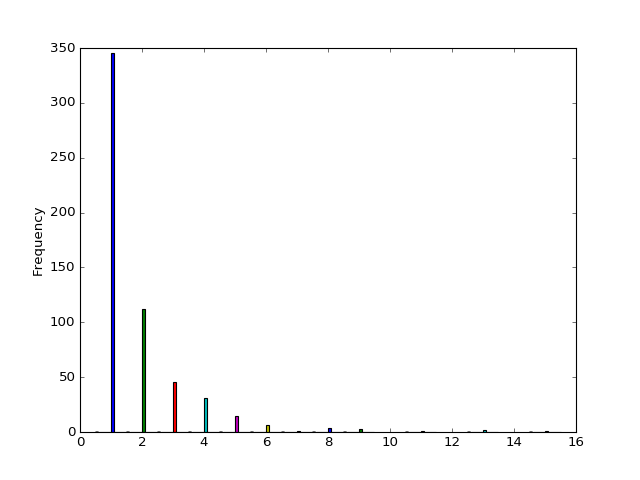

In [128]:
fig, ax = plt.subplots(figsize=(8,6))

dfQuellenGrouped = dfQuellenVerteilung.groupby(by='Häufigkeit').plot(kind='hist', ax=ax, legend=False)

In [131]:
import folium
from folium import plugins
from folium.map import *

Remove all entries where no latitude or longitude is given.

In [141]:
dfPoleisMap = dfPoleis.dropna(axis=0)

In [144]:
poleis_map = folium.Map(location=[dfPoleisMap["Latitude"][0],dfPoleisMap["Longitude"][0]], zoom_start=5)

marker = FeatureGroup(name='Poleis')

marker_cluster = folium.MarkerCluster().add_to(marker)
    
for i in range(len(dfPoleisMap)):
    folium.Marker([dfPoleisMap['Latitude'][i], dfPoleisMap['Longitude'][i]],popup='Cityname:' + str(dfPoleisMap["city"][i]) + ' CityIndex:' + str(dfPoleisMap["city_index"][i]),icon=folium.Icon(icon='ok')).add_to(marker_cluster)

poleis_map.add_children(marker)

poleis_map.add_children(folium.map.LayerControl())